In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import warnings

from sys import platform

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '/Users/oliverjcarter/Documents/GitHub/f1-analytics/'

warnings.filterwarnings("ignore", category=RuntimeWarning) 
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [6]:
### Load race and mereged DataFrames

weather = pd.read_csv(path+'data/weather.csv')

# weather = races.iloc[:,[0,1,2,3,4,5,6]]
# weather.shape

In [10]:
training_set = weather.query('coco.notnull()')

In [23]:
regression_model = LinearRegression()

X_train = [[x] for x in training_set.rhum.values]
Y_train = [[y] for y in training_set.coco.values]
X_predict = [[x] for x in training_set.rhum.values]

regression_model.fit(X_train, Y_train)
Y_predict = regression_model.predict(X_train)

In [24]:
# model evaluation
rmse = mean_squared_error(Y_train, Y_predict)
r2 = r2_score(Y_train, Y_predict)

In [25]:
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

Slope: [[0.03111014]]
Intercept: [2.47184603]
RMSE: 23.18940758917423
R2: 0.011549376382453902


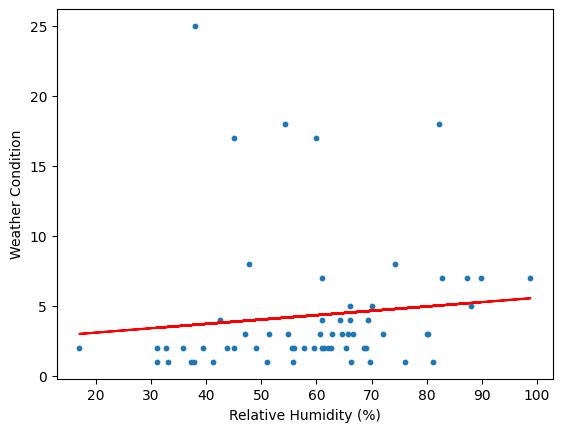

In [26]:
# predicted values

plt.scatter(X_train, Y_train, s=10)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Weather Condition')
plt.plot(X_train, Y_predict, color='r')
plt.show()